In [1]:
pwd

'/Users/mukeshchaudhary/Desktop/chicago-102819/module_1/week_3-project'

In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data and creat Dataframe for cleaning
original_tmdbmovies_df = pd.read_csv("data/tmdb.movies.csv")
tmdbmovies_df =original_tmdbmovies_df.copy()

In [3]:
#remove unname column of Dataframe

tmdbmovies_df=tmdbmovies_df.loc[:,~tmdbmovies_df.columns.str.contains('^Unname')]

In [4]:
tmdbmovies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
tmdbmovies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [54]:
tmdbmovies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
tmdbmovies_df['movies_name']=tmdbmovies_df['original_title']

tmdbmovies_df.info()

In [7]:
original_moviebudget=pd.read_csv('data/tn.movie_budgets.csv')
moviebudget_df=original_moviebudget.copy()

In [8]:
moviebudget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [116]:
moviebudget_df['movie'].value_counts()

Home                                      3
King Kong                                 3
Halloween                                 3
The Last House on the Left                2
Hercules                                  2
                                         ..
Maurice Richard                           1
Double Take                               1
The Offspring                             1
Les Couloirs du temps: Les visiteurs 2    1
Vanilla Sky                               1
Name: movie, Length: 5698, dtype: int64

In [60]:
moviebudget_df['movie'].astype('str')

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5782, dtype: object

In [25]:
moviebudget_df['releaseyear']=moviebudget_df['release_date'].month

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [48]:
#check duplicate
moviebudget_df[moviebudget_df.duplicated(keep=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [9]:
moviebudget_df['movies_name']=moviebudget_df['movie']

In [ ]:
moviebudget_df.rename(columns={'movie_name':'movies_name'},inplace=True)

In [10]:
moviebudget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movies_name
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi


In [191]:
merge_data=pd.merge(tmdbmovies_df,moviebudget_df,how='inner',on=['movies_name'])

In [192]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null object
domestic_gross       2316 non-null object
worldwide_gross      2316 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 307.6+ KB


In [193]:
merge_data.isnull().sum()

genre_ids            0
id_x                 0
original_language    0
original_title       0
popularity           0
release_date_x       0
title                0
vote_average         0
vote_count           0
movies_name          0
id_y                 0
release_date_y       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [197]:
merge_data[merge_data.original_title == 'Toy Story 3']

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522


In [14]:
merge_data.corr(method='pearson')

,id_x,popularity,vote_average,vote_count,id_y
id_x,1.000000,-0.151005,0.115572,-0.132785,0.042502
popularity,-0.151005,1.000000,0.065390,0.699522,-0.036696
vote_average,0.115572,0.065390,1.000000,0.086320,0.003180
vote_count,-0.132785,0.699522,0.086320,1.000000,-0.027487
id_y,0.042502,-0.036696,0.003180,-0.027487,1.000000


In [19]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30420 entries, 0 to 30419
Data columns (total 16 columns):
genre_ids            26597 non-null object
id_x                 26597 non-null float64
original_language    26597 non-null object
original_title       26597 non-null object
popularity           26597 non-null float64
release_date_x       26597 non-null object
title                26597 non-null object
vote_average         26597 non-null float64
vote_count           26597 non-null float64
movies_name          30420 non-null object
id_y                 6139 non-null float64
release_date_y       6139 non-null object
movie                6139 non-null object
production_budget    6139 non-null object
domestic_gross       6139 non-null object
worldwide_gross      6139 non-null object
dtypes: float64(5), object(11)
memory usage: 3.9+ MB


In [195]:
def replace_all(df,column_name):
    df[column_name]=df[column_name].map(lambda x : x.replace(',','') if type(x) is str else x )
    df[column_name]=df[column_name].map(lambda x : x.replace('$','') if type(x) is str else x )
    return(df)

In [196]:
merge_data=replace_all(merge_data,'production_budget')
merge_data=replace_all(merge_data,'domestic_gross')
merge_data=replace_all(merge_data,'worldwide_gross')

In [173]:
merge_data['production_budget'].astype(float)
merge_data['domestic_gross'].astype(float)
merge_data['worldwide_gross'].astype(float)

0                NaN
1        494870992.0
2        621156389.0
3        364545516.0
4        364545516.0
            ...     
30415            0.0
30416       240495.0
30417         1338.0
30418            0.0
30419       181041.0
Name: worldwide_gross, Length: 30420, dtype: float64

In [209]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null int64
domestic_gross       2316 non-null int64
worldwide_gross      2316 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 307.6+ KB


In [208]:
merge_data['production_budget']=merge_data['production_budget'].astype(int)
merge_data['domestic_gross']=merge_data['domestic_gross'].astype(int)
merge_data['worldwide_gross']=merge_data['worldwide_gross'].astype(int)

In [220]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null int64
domestic_gross       2316 non-null int64
worldwide_gross      2316 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 387.6+ KB


In [221]:
merge_data.drop_duplicates(keep='first',inplace=True)

In [222]:
merge_data[merge_data.duplicated(keep=False)]

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross


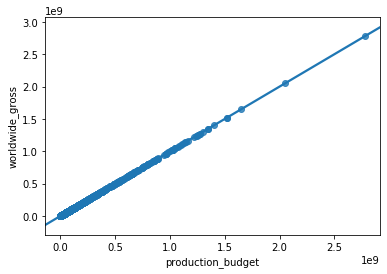

In [210]:
sns.regplot(x='production_budget',y='worldwide_gross',data=merge_data)

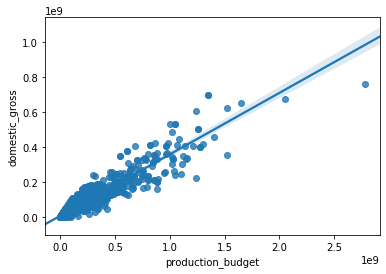

In [211]:
sns.regplot(x='production_budget',y='domestic_gross',data=merge_data)

In [224]:

sns.barplot(x='movies_name',y='worldwide_gross',data=topten_movie_data)

KeyError: 'worldwise_gross'

In [228]:
merge_data.sort_values('worldwide_gross')

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
221,"[28, 18, 53]",35402,en,Icarus,5.002,2010-09-10,Icarus,5.2,42,Icarus,91,"Feb 9, 2010",Icarus,0,0,0
155,"[10749, 878]",59457,en,Womb,8.483,2010-07-15,Womb,6.1,159,Womb,12,"Mar 30, 2012",Womb,0,0,0
1398,"[53, 35, 10749, 18]",278316,en,Da Sweet Blood of Jesus,2.607,2014-06-22,Da Sweet Blood of Jesus,4.6,33,Da Sweet Blood of Jesus,56,"Jan 13, 2015",Da Sweet Blood of Jesus,0,0,0
1397,[18],294086,en,Tiger Orange,2.620,2014-07-26,Tiger Orange,6.2,8,Tiger Orange,99,"Jul 7, 2015",Tiger Orange,0,0,0
1396,"[80, 53, 18]",164286,en,Down and Dangerous,2.621,2014-02-14,Down and Dangerous,4.3,9,Down and Dangerous,22,"Feb 14, 2014",Down and Dangerous,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,The Avengers,27,"May 4, 2012",The Avengers,1517935897,623279547,1517935897
1483,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,Furious 7,7.3,6538,Furious 7,67,"Apr 3, 2015",Furious 7,1518722794,353007020,1518722794
1478,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,Jurassic World,34,"Jun 12, 2015",Jurassic World,1648854864,652270625,1648854864
2182,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Avengers: Infinity War,7,"Apr 27, 2018",Avengers: Infinity War,2048134200,678815482,2048134200


/Users/mukeshchaudhary/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mukeshchaudhary/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


TypeError: '<=' not supported between instances of 'float' and 'str'

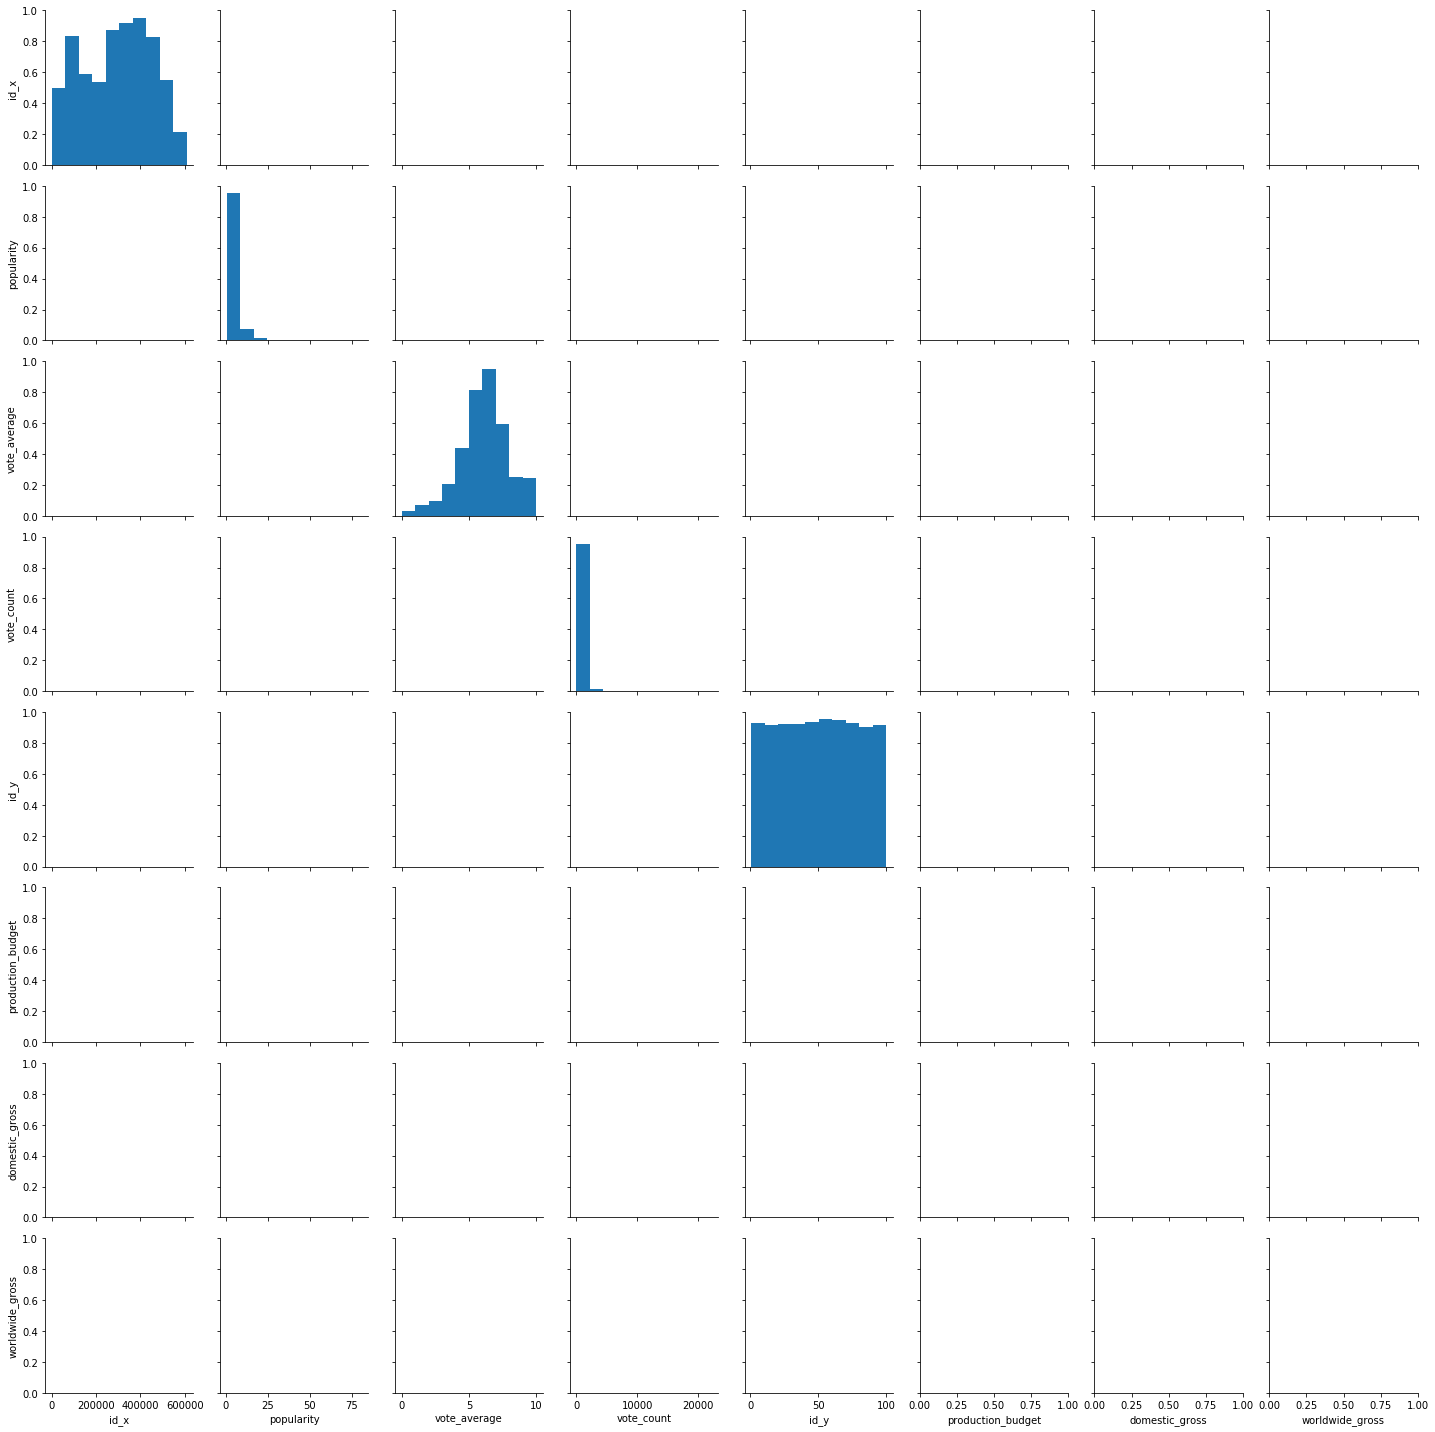

In [179]:
sns.pairplot(merge_data)
sns.plt.show()

In [181]:
movies_view = sns.barplot(x='movies_name',y= 'worldwide_gross',data=merge_data)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [171]:
merge_data.head()

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,"[12, 14, 10751]",12444.0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,Harry Potter and the Deathly Hallows: Part 1,NaN,NaN,NaN,NaN,NaN,NaN
1,"[14, 12, 16, 10751]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,How to Train Your Dragon,30.0,"Mar 26, 2010",How to Train Your Dragon,165000000,217581232,494870992
2,"[12, 28, 878]",10138.0,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0,Iron Man 2,15.0,"May 7, 2010",Iron Man 2,170000000,312433331,621156389
3,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,Toy Story,37.0,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
4,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,Toy Story,37.0,"Nov 22, 1995",Toy Story,30000000,191796233,364545516


In [163]:
test=pd.DataFrame({'name':['$1,000',200,'$300'],'item':['monitor','mouse','pad']})
test

,name,item
0,"$1,000",monitor
1,200,mouse
2,$300,pad


In [167]:
test=replace_all_test(test,'name')
test

,name,item
0,1000,monitor
1,200,mouse
2,300,pad


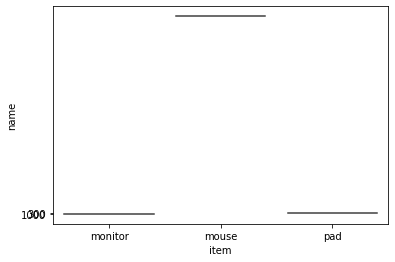

In [176]:
sns.boxenplot('item','name',data=test)

In [161]:
test['name']=test['name'].map(lambda x : x.replace(',','') if type(x) is str else x)
test['name'] =test['name'].map(lambda x : x.replace('$','') if type(x) is str else x)
test

,name,item
0,1000,monitor
1,200,mouse
2,300,pad


In [136]:
for i in test['name']:
    if type(i) is str:
       print(type(i))

<class 'str'>
<class 'str'>


In [166]:
def replace_all_test(df,column_name):
    df[column_name]=df[column_name].map(lambda x :  x.replace(',','') if type(x) is str else x)
    df[column_name]=df[column_name].map(lambda x :  x.replace('$','') if type(x) is str else x )

    return(df)

In [119]:
test['name'].astype(float)

0    1000.0
1     200.0
2     300.0
Name: name, dtype: float64

In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
name    3 non-null object
item    3 non-null object
dtypes: object(2)
memory usage: 176.0+ bytes


In [100]:
test['name']=replace_comma_dollor(test['name'])
test

,name,item
0,"$1,000",monitor
1,$200,mouse
2,$300,pad


In [95]:
dict_text={'$':'' ,',':''}
def replace_all(text,dic):
     df.map(lambda x : x.replace(',',''))
     df.map(lambda x : x.replace('$',''))
     return(df)              

In [56]:
x='$1,000'
b=x.replace(',','')
c=b.replace('$','')
c

'1000'

In [48]:
for i in test['name']:
    name_test=i.split()
    print(name_test)

['$1,000']
['$200']
['$300']


TypeError: Could not convert $165,000,000$170,000,000$30,000,000$30,000,000$160,000,000$95,000,000$425,000,000$200,000,000$69,000,000$130,000,000$90,000,000$90,000,000$200,000,000$3,000,000$200,000,000$3,000,000$82,000,000$260,000,000$17,000,000$68,000,000$80,000,000$85,000,000$80,000,000$60,000,000$117,000,000$155,000,000$30,000,000$110,000,000$23,000,000$23,000,000$150,000,000$40,000,000$40,000,000$65,000,000$140,000,000$130,000,000$125,000,000$15,000,000$210,000,000$99,000,000$210,000,000$99,000,000$35,000,000$165,000,000$8,000,000$160,000,000$75,000,000$24,000,000$150,000,000$95,000,000$95,000,000$13,000,000$15,000,000$100,000,000$37,000,000$47,000,000$95,000,000$35,000,000$1,750,000$28,000,000$130,000,000$130,000,000$48,000,000$12,500,000$3,500,000$55,000,000$65,000,000$32,000,000$40,000,000$8,000,000$15,000,000$19,000,000$100,000,000$25,000,000$26,000,000$19,000,000$50,000,000$100,000,000$16,000,000$18,000,000$24,000,000$5,700,000$60,000,000$60,000,000$52,000,000$30,000,000$1,987,650$112,000,000$100,000,000$28,000,000$20,000,000$40,000,000$7,300,000$85,000,000$11,000,000$100,000,000$75,000,000$20,000,000$10,000,000$25,000,000$4,200,000$500,000$500,000$36,000,000$15,000,000$8,000,000$60,000,000$95,000,000$3,750,000$45,000,000$2,000,000$25,000,000$35,000,000$1,800,000$14,000,000$14,000,000$20,000,000$20,000,000$150,000,000$150,000,000$16,000,000$2,000,000$30,000,000$1,800,000$30,000,000$1,800,000$44,000,000$35,000,000$12,500,000$4,500,000$8,000,000$30,000,000$5,000,000$8,000,000$1,800,000$30,000,000$20,000,000$80,000,000$1,500,000$35,000,000$20,000,000$1,000,000$1,000,000$20,000,000$6,800,000$32,000,000$10,000,000$37,000,000$13,000,000$4,000,000$55,000,000$13,700,000$7,000,000$50,000,000$40,000,000$13,000,000$4,000,000$25,000,000$17,000,000$22,000,000$10,000,000$500,000$500,000$32,000,000$42,000,000$7,000,000$9,500,000$3,000,000$50,000,000$20,000,000$3,750,000$45,000,000$22,000,000$20,000,000$12,000,000$19,000,000$7,000,000$17,000,000$35,000,000$10,000,000$7,000,000$15,000,000$90,000,000$80,000,000$12,500,000$15,000,000$30,000,000$30,000,000$2,000,000$8,000,000$7,000,000$1,900,000$13,000,000$12,000,000$21,000,000$20,000,000$50,000,000$50,000$20,000,000$69,000,000$18,000,000$3,000,000$10,000,000$10,000,000$31,000,000$20,000,000$15,000,000$25,000,000$1,000,000$9,200,000$9,000,000$3,000,000$10,000,000$10,000,000$2,900,000$11,500,000$90,000,000$10,000,000$3,000,000$7,000,000$14,000,000$6,000,000$6,000,000$6,000,000$12,500,000$2,000,000$1,400,000$3,000,000$200,000$200,000$2,500,000$6,500,000$2,600,000$1,100,000$21,000,000$5,000,000$6,000,000$18,000,000$2,000,000$2,000,000$65,000,000$10,000,000$10,000,000$3,800,000$2,500,000$60,000,000$60,000,000$90,000,000$90,000,000$6,000,000$6,000,000$300,000$10,000,000$10,000,000$500,000$500,000$10,000,000$250,000$2,100,000$10,000,000$10,000,000$5,000,000$10,000,000$5,000,000$10,000,000$5,000,000$10,000,000$5,000,000$5,600,000$10,000,000$1,600,000$8,000,000$127,000,000$127,000,000$70,000,000$70,000,000$25,000,000$5,000,000$5,000,000$400,000$57,500,000$250,000$1,000,000$1,000,000$10,000,000$10,000,000$20,000,000$20,000,000$3,500,000$26,000,000$26,000,000$250,000$300,000$5,000,000$5,000,000$35,000,000$8,900,000$35,000,000$8,900,000$5,000,000$5,000,000$4,900,000$4,900,000$3,800,000$12,000,000$12,000,000$50,000,000$50,000,000$150,000,000$80,000,000$410,600,000$79,300,000$140,000,000$200,000,000$93,000,000$27,000,000$35,000,000$57,000,000$125,000,000$10,000,000$90,000,000$35,000,000$150,000,000$200,000,000$46,500,000$90,000,000$20,000,000$12,000,000$12,000,000$110,000,000$1,500,000$40,000,000$20,000,000$32,000,000$15,000,000$45,000,000$25,000,000$50,000,000$30,000,000$30,000,000$60,000,000$40,000,000$70,000,000$15,000,000$27,000,000$110,000,000$75,000,000$63,000,000$7,000,000$90,000,000$110,000,000$135,000,000$75,000,000$50,000,000$42,500,000$25,000,000$50,000,000$35,000,000$35,000,000$55,000,000$50,200,000$19,000,000$115,000,000$32,000,000$40,000,000$30,000,000$6,500,000$3,000,000$85,000,000$25,000,000$25,000,000$180,000,000$70,000,000$20,000,000$80,000,000$25,000,000$40,000,000$6,500,000$8,000,000$38,000,000$85,000,000$52,000,000$10,000,000$40,000,000$3,700,000$30,000,000$17,000,000$45,000,000$130,000,000$7,000,000$7,000,000$90,000,000$35,000,000$42,000,000$40,000,000$25,000,000$35,000,000$2,500,000$45,000,000$19,000,000$28,000,000$79,000,000$4,750,000$30,000,000$9,400,000$60,000,000$20,000,000$21,000,000$80,000,000$34,800,000$4,500,000$37,000,000$40,000,000$50,000,000$50,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$20,000,000$20,000,000$70,000,000$70,000$20,000,000$3,200,000$15,000,000$24,000,000$8,200,000$25,000,000$25,000,000$6,000,000$16,000,000$17,000,000$15,000,000$23,000,000$250,000$175,000$23,000,000$27,000,000$68,000,000$50,000,000$32,500,000$30,000,000$37,000,000$5,000,000$13,000,000$70,000,000$3,400,000$25,000,000$1,000,000$25,000,000$40,000,000$40,000,000$40,000,000$30,000,000$4,000,000$130,000,000$50,000,000$14,000,000$18,000,000$2,000,000$150,000,000$3,000,000$15,000,000$5,250,000$10,000,000$25,000,000$14,000,000$4,000,000$12,000,000$35,000,000$13,000,000$5,000,000$750,000$7,000,000$2,000,000$18,000,000$25,000,000$5,000,000$12,000,000$190,000$24,000,000$3,500,000$16,000,000$135,000,000$27,500,000$5,000,000$5,000,000$40,000,000$25,000,000$12,500,000$4,000,000$4,000,000$3,000,000$3,000,000$10,000,000$8,900,000$15,000,000$35,000,000$4,500,000$6,000,000$6,000,000$20,000,000$19,100,000$5,000,000$30,000,000$1,900,000$2,000,000$21,000,000$1,100,000$8,000,000$30,000,000$135,000$14,500,000$12,000,000$10,000,000$2,000,000$41,000,000$36,000,000$8,000,000$500,000$500,000$750,000$5,500,000$25,000,000$7,500,000$6,000,000$38,000,000$9,000,000$5,500,000$10,000,000$10,000,000$2,100,000$25,000,000$25,000,000$3,000,000$4,000,000$195,000,000$930,000$8,000,000$3,000,000$1,000,000$175,000,000$175,000,000$11,000,000$1,800,000$6,000,000$1,000,000$2,900,000$85,000,000$900,000$116,000,000$25,000,000$116,000,000$25,000,000$3,400,000$67,000,000$4,700,000$25,000,000$200,000$125,000,000$200,000,000$200,000,000$1,200,000$1,000,000$60,000$30,000,000$30,000,000$9,000$17,000,000$4,200,000$4,200,000$4,200,000$40,000$25,000,000$350,000$350,000$160,000,000$13,400,000$1,500,000$80,000,000$7,000,000$7,000,000$18,000,000$6,750,000$2,300,000$51,000,000$49,000,000$30,000,000$30,000,000$3,000,000$1,500,000$250,000$42,000,000$42,000,000$5,000,000$10,000,000$27,000,000$150,000$20,000,000$20,000,000$20,000,000$225,000$225,000$60,000,000$2,000,000$2,000,000$185,000,000$3,000,000$3,000,000$45,000,000$4,000,000$4,000,000$300,000$300,000$500,000$40,000,000$40,000,000$40,000,000$40,000,000$3,000,000$3,000,000$15,000,000$850,000$15,000,000$850,000$225,000,000$60,000,000$250,000,000$160,000,000$20,000,000$160,000,000$20,000,000$275,000,000$215,000,000$125,000,000$12,000,000$220,000,000$165,000,000$220,000,000$100,000,000$170,000,000$200,000,000$185,000,000$145,000,000$275,000,000$60,000,000$125,000,000$30,000,000$95,000,000$125,000,000$65,000,000$100,000,000$50,000,000$45,000,000$30,000,000$45,000,000$44,500,000$150,000,000$33,000,000$15,000,000$21,000,000$85,000,000$13,000,000$120,000,000$150,000,000$145,000,000$42,000,000$102,000,000$1,000,000$39,000,000$50,000,000$79,000,000$52,500,000$80,000,000$16,000,000$65,000,000$17,000,000$10,000,000$7,000,000$20,000,000$60,000,000$70,000,000$45,000,000$85,000,000$15,000,000$25,000,000$85,000,000$30,000,000$37,500,000$57,500,000$15,000,000$65,000,000$65,000,000$12,000,000$67,500,000$35,000,000$11,000,000$25,000,000$37,500,000$12,000,000$26,000,000$12,000,000$65,000,000$31,000,000$70,000,000$22,000,000$15,000,000$20,000,000$42,000,000$2,000,000$10,000,000$1,100,000$13,500,000$33,000,000$40,000,000$30,000,000$9,700,000$95,000,000$42,000,000$58,000,000$55,000,000$25,000,000$49,000,000$35,000,000$32,500,000$50,000,000$35,000,000$12,000,000$12,000,000$21,500,000$6,000,000$3,000,000$3,000,000$30,000,000$40,000,000$750,000$16,000,000$10,000,000$10,000,000$14,000,000$20,000,000$5,000,000$40,000,000$25,000,000$31,000,000$6,900,000$15,000,000$10,000,000$42,000,000$60,000,000$30,000,000$17,700,000$12,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$10,000,000$40,000,000$10,000,000$20,000,000$35,000,000$17,000,000$650,000$650,000$8,000,000$1,800,000$45,000,000$2,500,000$22,000,000$4,300,000$1,000,000$6,000,000$12,000,000$35,000,000$120,000$14,000,000$3,000,000$800,000$270,000$2,300,000$2,300,000$2,300,000$2,300,000$2,300,000$2,300,000$2,300,000$27,500,000$40,000,000$16,000,000$3,000,000$20,000,000$25,000,000$1,000,000$2,000,000$1,000,000$100,000$10,000,000$19,000,000$19,000,000$7,000,000$4,000,000$900,000$300,000$12,000,000$500,000$4,000,000$2,000,000$3,000,000$12,000,000$12,000,000$12,000,000$6,000,000$500,000$7,000,000$1,000,000$14,000,000$14,000,000$20,000,000$20,000,000$546,173$1,200,000$25,000,000$60,000$4,000,000$2,000,000$2,100,000$250,000$60,000$5,600,000$1,200,000$5,000,000$1,200,000$1,800,000$1,800,000$3,000,000$1,800,000$7,500,000$65,000,000$800,000$800,000$20,000,000$1,000,000$8,000,000$8,000,000$500,000$2,500,000$175,000$175,000$5,000,000$5,000,000$5,000,000$5,000,000$50,000,000$500,000$500,000$23,000,000$23,000,000$23,000,000$30,000,000$30,000,000$1,250,000$46,000,000$70,000,000$70,000,000$28,000,000$12,000,000$400,000$100,000,000$100,000,000$40,000$3,000,000$200,000,000$150,000,000$100,000,000$110,000,000$225,000,000$175,000,000$3,000,000$130,000,000$250,000,000$190,000,000$200,000,000$130,000,000$76,000,000$20,000,000$120,000,000$78,000,000$20,000,000$70,000,000$120,000,000$55,000,000$38,000,000$1,200,000$43,000,000$190,000,000$75,000,000$26,000,000$20,000,000$60,000,000$135,000,000$50,000,000$23,000,000$23,000,000$30,000,000$92,000,000$90,000,000$110,000,000$55,000,000$40,000,000$190,000,000$7,000,000$170,000,000$140,000,000$18,000,000$18,000,000$84,000,000$35,000,000$135,000,000$61,000,000$28,000,000$37,000,000$38,000,000$190,000,000$22,000,000$130,000,000$46,000,000$12,000,000$100,000,000$70,000,000$3,450,000$2,500,000$1,000,000$35,000,000$35,000,000$200,000,000$3,500,000$30,000,000$17,000,000$60,000,000$150,000,000$15,000,000$110,000,000$10,000,000$5,500,000$195,000,000$20,000,000$10,000,000$275,000,000$40,000,000$40,000,000$50,000,000$5,000,000$5,000,000$50,000,000$15,000,000$3,000,000$3,500,000$50,000,000$1,000,000$3,000,000$12,800,000$80,000,000$31,000,000$32,500,000$50,000,000$55,000,000$18,000,000$91,000,000$12,000,000$5,000,000$80,000,000$25,000,000$11,000,000$18,000,000$30,000,000$20,000,000$30,000,000$19,200,000$4,800,000$750,000$5,000,000$12,000,000$15,000,000$900,000$25,000,000$25,000,000$35,000,000$16,000,000$950,000$13,300,000$13,300,000$12,000,000$30,000,000$200,000$30,000,000$200,000$32,000,000$18,000,000$22,000,000$28,000,000$19,000,000$500,000$12,000,000$60,000,000$60,000,000$15,000,000$10,600,000$8,000,000$8,500,000$17,000,000$2,500,000$1,500,000$25,000,000$11,000,000$35,000,000$5,000,000$16,000,000$13,000,000$6,500,000$18,000,000$420,000$420,000$22,000,000$40,000,000$145,000,000$4,000,000$15,000,000$1,500,000$1,000,000$1,000,000$18,000,000$5,300,000$250,000$2,500,000$950,000$5,000,000$7,000,000$26,000,000$1,900,000$28,000,000$900,000$100,000$4,500,000$3,100,000$3,300,000$3,300,000$9,000,000$4,000,000$10,000,000$8,000,000$20,000,000$650,000$1,900,000$1,500,000$1,900,000$1,500,000$2,000,000$35,000,000$35,000,000$2,000,000$45,000,000$1,500,000$115,000,000$1,200,000$1,800,000$3,000,000$1,000,000$2,000,000$55,000$1,200,000$150,000,000$150,000,000$4,000,000$11,000,000$3,000,000$1,400,000$150,000$50,000,000$50,000,000$2,500,000$250,000$250,000$9,900,000$20,000$1,000,000$150,000$1,700,000$12,000,000$42,000$15,000,000$625,000$17,500,000$2,000,000$2,000,000$2,000,000$7,000,000$2,500,000$3,500,000$3,500,000$50,000$50,000$1,250,000$5,000,000$5,000,000$45,000$200,000,000$1,500,000$100,000$600,000$600,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$1,100,000$500,000$75,000,000$250,000$6,000,000$6,000,000$4,600,000$90,000,000$90,000,000$90,000,000$20,000,000$20,000,000$100,000$100,000$130,000,000$130,000,000$130,000,000$1,000,000$132,000,000$27,000$100,000$35,000,000$35,000,000$58,000,000$12,000,000$1,200,000$22,000$60,000,000$15,000,000$250,000$35,000$50,000$550,000$2,000,000$30,000,000$250,000,000$170,000,000$200,000,000$34,000,000$165,000,000$165,000,000$125,000,000$15,000,000$61,000,000$80,000,000$70,000,000$55,000,000$165,000,000$9,000,000$170,000,000$145,000,000$140,000,000$94,000,000$94,000,000$125,000,000$13,500,000$8,500,000$80,000,000$160,000,000$125,000,000$100,000,000$70,000,000$110,000,000$210,000,000$132,000,000$65,000,000$200,000,000$40,000,000$127,000,000$178,000,000$60,000,000$28,000,000$180,000,000$1,200,000$100,000,000$58,000,000$58,000,000$40,000,000$2,000,000$2,000,000$31,000,000$130,000,000$170,000,000$120,000,000$13,000,000$15,000,000$85,000,000$40,000,000$50,000,000$50,000,000$13,000,000$22,000,000$12,000,000$40,000,000$17,000,000$44,000,000$5,000,000$1,000,000$18,000,000$12,600,000$40,000,000$13,200,000$100,000,000$20,000,000$20,000,000$35,000,000$6,500,000$18,500,000$16,000,000$15,000,000$70,000,000$56,200,000$66,000,000$8,500,000$65,000,000$70,000,000$145,000,000$65,000,000$65,000,000$18,000,000$20,000,000$20,000,000$11,000,000$10,000,000$26,000,000$2,000,000$50,000,000$30,000,000$60,000,000$50,000,000$52,000,000$4,000,000$4,900,000$60,000,000$28,000,000$20,000,000$4,000,000$5,000,000$25,000,000$8,000,000$5,000,000$8,800,000$45,000,000$5,000,000$25,000,000$30,000,000$1,000,000$15,000,000$80,000,000$80,000,000$15,000,000$15,000,000$5,000,000$4,500,000$4,000,000$50,000$4,000,000$50,000$2,300,000$12,000,000$2,100,000$18,000,000$20,000,000$10,000,000$5,000,000$9,000,000$28,000,000$950,000$1,600,000$2,000,000$55,000,000$5,000,000$10,000,000$50,000,000$3,300,000$25,000,000$3,000,000$20,000,000$25,000,000$3,000,000$8,000,000$18,000,000$18,000,000$18,000,000$26,000,000$4,000,000$13,000,000$1,000,000$1,500,000$5,000,000$22,000,000$22,000,000$24,000,000$18,000,000$1,000,000$16,000,000$9,000,000$9,000,000$5,000,000$10,000,000$10,000,000$14,000,000$10,000,000$10,000,000$6,000,000$6,000,000$25,000,000$7,000,000$7,000,000$2,600,000$3,200,000$1,250,000$5,500,000$36,000,000$3,000,000$33,000,000$7,000,000$13,000,000$5,000,000$3,500,000$12,000,000$4,000,000$40,000,000$28,000,000$2,500,000$160,000$12,000,000$30,000,000$10,000,000$6,000,000$6,000,000$50,000,000$50,000,000$15,000,000$30,000,000$3,500,000$30,000,000$7,000,000$1,700,000$1,000,000$5,000,000$5,000,000$5,000,000$70,000$4,000,000$1,000,000$5,500,000$8,000,000$10,100,000$5,000,000$8,000,000$85,000,000$25,000,000$1,400,000$1,000,000$1,000,000$55,000,000$10,000,000$1,100,000$50,000$100,000$1,250,000$3,000,000$250,000$800,000$5,500,000$5,500,000$25,000,000$1,000,000$200,000$1,800,000$45,000,000$45,000,000$45,000,000$25,000$1,400,000$75,000$200,000$150,000$150,000$20,000,000$1,300,000$20,000,000$45,000,000$9,000,000$2,500,000$1,000,000$250,000$300,000$3,000,000$180,000$450,000$250,000$500,000$2,000,000$600,000$200,000$5,900,000$5,900,000$5,900,000$42,000,000$42,000,000$42,000,000$30,000$30,000$30,000$26,000,000$13,000,000$3,000,000$7,500,000$4,200,000$114,000$250,000$250,000$500,000$11,000,000$60,000,000$500,000$5,000,000$5,500,000$6,000,000$6,000,000$500,000$250,000$330,600,000$130,000,000$300,000,000$300,000,000$95,000,000$2,900,000$150,000,000$48,000,000$110,000,000$50,000,000$30,000,000$49,000,000$179,000,000$108,000,000$108,000,000$95,000,000$40,000,000$215,000,000$62,000,000$62,000,000$30,000,000$30,000,000$190,000,000$170,000,000$13,000,000$13,000,000$65,000,000$65,000,000$160,000,000$160,000,000$135,000,000$135,000,000$5,000,000$58,000,000$58,000,000$13,000,000$29,000,000$35,000,000$2,000,000$68,000,000$187,500,000$187,500,000$50,000,000$35,000,000$10,700,000$61,000,000$70,000,000$80,000,000$80,000,000$80,000,000$120,000,000$87,500,000$37,000,000$37,000,000$20,000,000$20,000,000$20,000,000$65,000,000$38,000,000$23,000,000$4,500,000$4,500,000$90,000,000$53,000,000$53,000,000$60,000,000$60,000,000$40,000,000$100,000,000$100,000,000$28,000,000$31,000,000$35,000,000$74,000,000$30,000,000$55,000,000$3,500,000$3,500,000$22,000,000$60,000,000$11,800,000$11,800,000$150,000,000$4,500,000$40,000,000$40,000,000$20,000,000$20,000,000$40,000,000$11,000,000$11,000,000$2,000,000$35,000,000$28,000,000$28,000,000$12,000,000$22,500,000$5,000,000$99,000,000$99,000,000$34,000,000$30,000,000$2,000,000$65,000,000$15,000,000$1,000,000$40,000,000$60,000,000$8,000,000$8,000,000$5,000,000$5,000,000$5,000,000$60,000,000$25,000,000$28,000,000$5,000,000$5,000,000$10,000,000$55,000,000$55,000,000$32,000,000$37,000,000$35,000,000$12,000,000$100,000,000$24,000,000$15,000,000$2,000,000$4,500,000$74,000,000$33,000,000$33,000,000$6,000,000$6,000,000$13,000,000$10,000,000$7,000,000$100,000$40,000,000$40,000,000$8,500,000$25,000,000$25,000,000$10,000,000$30,000,000$30,000,000$1,700,000$14,500,000$8,000,000$30,000,000$35,000,000$4,500,000$3,500,000$3,500,000$18,000,000$18,000,000$3,000,000$17,000,000$10,000,000$1,000,000$14,000,000$5,000,000$5,000,000$7,000,000$7,000,000$13,000,000$20,000,000$14,000,000$11,000,000$10,000,000$4,000,000$22,000,000$1,400,000$3,000,000$7,000,000$10,000,000$1,600,000$10,000,000$1,200,000$2,000,000$10,000,000$10,000,000$8,000,000$7,500,000$20,000,000$20,000,000$3,000,000$5,000,000$18,000,000$3,000,000$200,000$2,500,000$1,000,000$26,000,000$26,000,000$20,000,000$75,000,000$58,000,000$75,000,000$58,000,000$500,000$3,000,000$1,500,000$25,000$10,000,000$4,500,000$20,000,000$5,000,000$2,300,000$13,000,000$13,000,000$15,000,000$35,000,000$35,000,000$2,000,000$15,000,000$15,000,000$2,000,000$8,000,000$3,000,000$4,400,000$3,000,000$9,500,000$45,000,000$4,000,000$1,500,000$1,500,000$2,000,000$2,000,000$4,000,000$1,000,000$1,000,000$2,500,000$700,000$7,700,000$1,200,000$16,000,000$1,500,000$1,900,000$10,000,000$10,000,000$20,000,000$150,000,000$150,000,000$150,000,000$3,500,000$850,000$30,000,000$4,000,000$68,000,000$68,000,000$20,000,000$20,000,000$20,000,000$28,000,000$28,000,000$600,000$4,700,000$2,000,000$75,000$350,000$1,500,000$2,000,000$2,000,000$12,000,000$1,300,000$500,000$1,300,000$500,000$3,500,000$100,000$1,000,000$35,000,000$10,000,000$10,000,000$50,000$6,500,000$8,300,000$20,000,000$20,000,000$1,000,000$1,000,000$8,000,000$35,000$250,000$600,000$12,000,000$50,000$300,000$178,000,000$250,000,000$58,000,000$165,000,000$165,000,000$20,000,000$180,000,000$180,000,000$250,000,000$150,000,000$90,000,000$47,000,000$47,000,000$100,000,000$100,000,000$40,000,000$40,000,000$50,000,000$160,000,000$200,000,000$200,000,000$175,000,000$27,000,000$140,000,000$106,000,000$106,000,000$185,000,000$10,000,000$140,000,000$90,000,000$105,000,000$60,000,000$73,000,000$5,000,000$35,000,000$75,000,000$75,000,000$75,000,000$75,000,000$12,000,000$12,000,000$60,000,000$60,000,000$20,000,000$170,000,000$8,500,000$8,500,000$175,000,000$40,000,000$125,000,000$125,000,000$20,000,000$20,000,000$140,000,000$22,500,000$22,500,000$144,000,000$30,000,000$1,500,000$1,500,000$12,000,000$165,000,000$40,000,000$40,000,000$200,000,000$60,000,000$19,000,000$135,000,000$38,000,000$38,000,000$180,000,000$25,000,000$25,000,000$120,000,000$50,000,000$20,000,000$13,000,000$110,000,000$110,000,000$55,000,000$40,000,000$40,000,000$50,000,000$50,000,000$156,000,000$156,000,000$31,500,000$20,000,000$30,000,000$30,000,000$50,000,000$40,000,000$38,000,000$36,000,000$36,000,000$20,000,000$24,000,000$24,000,000$70,000,000$2,500,000$5,000,000$15,000,000$15,000,000$22,000,000$18,000,000$18,000,000$70,000,000$20,000,000$9,000,000$9,000,000$7,500,000$33,000,000$9,000,000$9,000,000$23,000,000$29,000,000$11,500,000$65,000,000$65,000,000$27,000,000$43,000,000$43,000,000$35,000,000$30,000,000$30,000,000$45,000,000$20,000,000$50,000,000$46,500,000$46,500,000$10,000,000$2,000,000$1,500,000$13,000,000$5,000,000$95,000,000$15,000,000$20,000,000$13,000,000$10,000,000$10,000,000$3,000,000$75,000,000$10,000,000$10,000,000$47,500,000$18,000,000$5,000,000$5,000,000$18,000,000$18,000,000$18,000,000$17,000,000$18,000,000$10,000,000$10,000,000$8,000,000$4,000,000$4,000,000$28,000,000$5,000,000$15,000,000$10,000,000$10,000,000$25,000,000$9,000,000$5,000,000$3,500,000$10,000,000$5,000,000$1,500,000$18,000,000$50,000,000$35,000,000$77,500,000$9,000,000$9,000,000$8,500,000$29,000,000$4,000,000$16,000,000$16,000,000$20,000,000$10,000,000$110,000$10,000,000$110,000$10,000,000$750,000$5,000,000$10,000,000$3,200,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$1,500,000$11,000,000$5,000,000$8,000,000$8,000,000$36,000,000$5,000,000$18,000,000$17,000,000$15,000,000$900,000$2,500,000$250,000$250,000$16,800,000$916,000$916,000$916,000$170,000$8,000,000$10,000,000$180,000$180,000$35,000,000$500,000$3,000,000$33,000,000$20,000,000$3,000,000$9,000,000$14,000,000$38,000,000$18,000,000$2,000,000$3,500,000$55,000,000$1,100,000$500,000$20,000,000$60,000,000$1,000,000$80,000,000$29,000,000$29,000,000$15,000,000$20,000,000$20,000,000$1,500,000$500,000$6,800,000$6,000,000$6,000,000$45,000,000$185,000,000$185,000,000$175,000,000$180,000,000$180,000,000$300,000,000$300,000,000$185,000,000$250,000,000$37,500,000$230,000,000$175,000,000$175,000,000$97,000,000$150,000,000$104,000,000$217,000,000$180,000,000$152,000,000$34,000,000$19,500,000$19,500,000$84,000,000$84,000,000$175,000,000$85,000,000$30,000,000$110,000,000$15,000,000$5,000,000$90,000,000$90,000,000$20,000,000$20,000,000$111,000,000$111,000,000$80,000,000$150,000,000$35,000,000$195,000,000$80,000,000$175,000,000$38,000,000$12,000,000$12,000,000$10,000,000$50,000,000$50,000,000$7,000,000$28,000,000$28,000,000$75,000,000$10,000,000$10,000,000$55,000,000$55,000,000$120,000,000$29,000,000$90,000,000$60,000,000$50,000,000$50,000,000$60,000,000$63,000,000$11,000,000$11,000,000$30,000,000$30,000,000$30,000,000$45,000,000$45,000,000$50,000,000$35,000,000$35,000,000$70,000,000$5,000,000$35,000,000$20,000,000$30,000,000$60,000,000$20,000,000$38,000,000$10,000,000$35,000,000$35,000,000$25,000,000$100,000,000$100,000,000$25,000,000$10,000,000$10,000,000$20,000,000$22,000,000$22,000,000$25,000,000$25,000,000$5,000,000$5,000,000$10,000,000$55,000,000$25,000,000$25,000,000$100,000$2,000,000$24,000,000$5,000,000$5,000,000$40,000,000$10,000,000$21,000,000$18,000,000$22,000,000$68,000,000$68,000,000$15,000,000$30,000,000$60,000,000$12,000,000$7,500,000$7,500,000$25,000,000$7,400,000$26,000,000$20,000,000$25,000,000$40,000,000$17,000,000$10,000,000$8,000,000$8,000,000$29,200,000$40,000,000$700,000$125,000,000$6,500,000$6,500,000$28,000,000$22,000,000$22,000,000$18,000,000$12,000,000$31,000,000$3,000,000$12,000,000$12,000,000$30,000,000$10,000,000$5,000,000$125,000,000$45,000,000$1,000,000$5,200,000$90,000,000$1,000,000$1,250,000$20,000,000$21,000,000$40,000,000$17,500,000$2,000,000$29,000,000$1,200,000$20,000,000$250,000$250,000$3,000,000$3,000,000$500,000$2,000,000$4,357,373$2,000,000$40,000,000$1,200,000$1,300,000$65,000,000$4,000,000$25,000,000$400,000$26,000,000$12,000,000$500,000$300,000,000$200,000,000$130,000,000$102,000,000$100,000,000$110,000,000$160,000,000$55,000,000$200,000,000$23,000,000$170,000,000$20,000,000$25,000,000$178,000,000$32,000,000$130,000,000$150,000,000$155,000,000$35,000,000$275,000,000$88,000,000$17,000,000$15,000,000$13,000,000$50,000,000$65,000,000$132,900,000$80,000,000$125,000,000$10,000,000$19,800,000$55,000,000$15,000,000$90,000,000$51,000,000$120,000,000$34,000,000$30,000,000$10,500,000$61,000,000$77,000,000$60,000,000$30,000,000$48,000,000$55,000,000$45,000,000$21,000,000$3,000,000$35,000,000$20,000,000$75,000,000$15,000,000$10,000,000$325,000$40,000,000$6,000,000$35,000,000$40,000,000$12,000,000$37,000,000$42,000,000$23,000,000$69,000,000$30,000,000$30,000,000$1,000,000$9,000,000$10,000,000$10,000,000$20,000,000$50,000,000$15,700,000$1,500,000$32,000,000$82,500,000$25,000,000$10,000,000$50,000,000$3,500,000$3,200,000$10,000,000$2,000,000$15,000,000$30,000,000$38,000,000$30,000,000$12,000,000$40,000,000$5,000,000$2,000,000$35,000,000$59,000,000$5,500,000$3,500,000$19,000,000$103,000,000$3,500,000$5,000,000$30,000,000$18,000,000$20,000,000$10,000,000$5,000,000$7,000,000$30,000,000$77,500,000$3,800,000$8,000,000$400,000$500,000$65,000,000$26,000,000$25,000,000$1,660,000$2,700,000$8,000,000$1,500,000$2,660,000$3,500,000$15,000,000$30,000,000$50,000,000$70,000,000$7,200,000$60,000,000$40,000,000$21,000,000$25,000,000$25,000,000$25,000,000$25,000,000$38,000,000$9,000,000$12,000,000$350,000,000$317,000,000$306,000,000$300,000,000$258,000,000$250,000,000$232,000,000$230,000,000$225,000,000$225,000,000$210,000,000$210,000,000$207,000,000$23,000,000$672,000$205,000,000$200,000,000$200,000,000$200,000,000$200,000,000$200,000,000$200,000,000$190,000,000$186,000,000$185,000,000$182,000,000$28,000,000$180,000,000$180,000,000$180,000,000$178,000,000$175,000,000$175,000,000$175,000,000$175,000,000$175,000,000$175,000,000$175,000,000$175,000,000$175,000,000$170,000,000$170,000,000$170,000,000$170,000,000$170,000,000$163,000,000$160,000,000$160,000,000$160,000,000$160,000,000$155,000,000$155,000,000$151,500,000$151,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$150,000,000$149,000,000$145,000,000$145,000,000$142,000,000$140,000,000$140,000,000$140,000,000$140,000,000$140,000,000$140,000,000$139,000,000$138,000,000$138,000,000$137,500,000$137,000,000$137,000,000$136,200,000$135,000,000$135,000,000$135,000,000$130,000,000$130,000,000$130,000,000$130,000,000$129,000,000$127,500,000$127,500,000$125,000,000$125,000,000$125,000,000$125,000,000$125,000,000$125,000,000$125,000,000$125,000,000$125,000,000$123,000,000$120,000,000$120,000,000$120,000,000$120,000,000$120,000,000$120,000,000$120,000,000$120,000,000$120,000,000$22,000,000$120,000,000$115,000,000$115,000,000$115,000,000$115,000,000$115,000,000$115,000,000$113,500,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$110,000,000$6,000,000$110,000,000$109,000,000$109,000,000$109,000,000$105,000,000$105,000,000$105,000,000$105,000,000$105,000,000$103,300,000$103,000,000$103,000,000$102,500,000$102,000,000$12,000,000$102,000,000$100,000,000$100,000,000$100,000,000$5,800,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$4,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$100,000,000$99,000,000$98,000,000$97,000,000$95,000,000$95,000,000$95,000,000$94,000,000$94,000,000$94,000,000$94,000,000$93,000,000$92,500,000$92,000,000$92,000,000$12,000,000$92,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$90,000,000$88,000,000$88,000,000$87,000,000$86,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$85,000,000$84,000,000$84,000,000$82,500,000$82,500,000$82,500,000$82,000,000$82,000,000$82,000,000$81,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$1,200,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$80,000,000$78,000,000$78,000,000$78,000,000$78,000,000$78,000,000$77,600,000$76,000,000$76,000,000$76,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$75,000,000$73,243,106$73,000,000$73,000,000$73,000,000$72,500,000$72,500,000$72,500,000$72,500,000$72,000,000$72,000,000$72,000,000$72,000,000$72,000,000$72,000,000$71,682,975$71,500,000$70,702,619$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$70,000,000$68,000,000$68,000,000$68,000,000$68,000,000$68,000,000$67,500,000$67,500,000$67,000,000$66,000,000$66,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$10,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$65,000,000$64,000,000$64,000,000$63,700,000$63,000,000$63,000,000$63,000,000$62,000,000$62,000,000$62,000,000$62,000,000$62,000,000$61,000,000$61,000,000$60,720,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$50,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$60,000,000$59,500,000$59,000,000$58,000,000$58,000,000$58,000,000$58,000,000$58,000,000$58,000,000$58,000,000$57,500,000$57,000,000$57,000,000$57,000,000$57,000,000$56,000,000$56,000,000$56,000,000$56,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$55,000,000$2,000,000$55,000,000$54,000,000$54,000,000$54,000,000$54,000,000$54,000,000$54,000,000$54,000,000$53,012,938$30,000,000$53,000,000$53,000,000$53,000,000$53,000,000$53,000,000$53,000,000$53,000,000$53,000,000$52,000,000$52,000,000$52,000,000$52,000,000$52,000,000$52,000,000$52,000,000$51,000,000$51,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$50,000,000$49,800,000$49,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$48,000,000$47,500,000$47,000,000$47,000,000$47,000,000$47,000,000$47,000,000$47,000,000$47,000,000$46,000,000$46,000,000$46,000,000$46,000,000$46,000,000$45,500,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$45,000,000$2,289,247$45,000,000$44,000,000$44,000,000$44,000,000$44,000,000$44,000,000$43,000,000$43,000,000$43,000,000$43,000,000$43,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$42,000,000$41,000,000$41,000,000$41,000,000$41,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$40,000,000$39,000,000$39,000,000$39,000,000$39,000,000$39,000,000$25,000,000$39,000,000$39,000,000$38,600,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$38,000,000$37,500,000$37,000,000$20,000,000$37,000,000$37,000,000$37,000,000$37,000,000$37,000,000$37,000,000$36,500,000$36,000,000$36,000,000$36,000,000$36,000,000$36,000,000$36,000,000$36,000,000$36,000,000$36,000,000$36,000,000$36,000,000$36,000,000$36,000,000$35,200,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$658,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$35,000,000$34,000,000$34,000,000$34,000,000$34,000,000$34,000,000$34,000,000$33,500,000$33,000,000$33,000,000$33,000,000$33,000,000$33,000,000$33,000,000$33,000,000$33,000,000$32,500,000$32,500,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$32,000,000$31,500,000$31,000,000$31,000,000$31,000,000$31,000,000$31,000,000$31,000,000$30,250,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$30,000,000$29,000,000$29,000,000$29,000,000$29,000,000$29,000,000$29,000,000$29,000,000$29,000,000$29,000,000$29,000,000$29,000,000$28,700,000$28,500,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$1,500,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$28,000,000$27,500,000$27,500,000$27,500,000$27,500,000$27,500,000$27,500,000$27,500,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$27,000,000$26,700,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$26,000,000$25,530,000$25,500,000$25,100,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$2,800,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$24,200,000$14,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$24,000,000$23,600,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$23,000,000$22,700,000$22,500,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$22,000,000$21,600,000$21,600,000$21,500,000$21,500,000$21,500,000$21,000,000$11,500,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$21,000,000$20,700,000$20,500,000$20,500,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$20,000,000$19,700,000$19,500,000$19,400,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$2,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$19,000,000$18,975,000$18,900,000$18,500,000$18,500,000$18,500,000$18,500,000$18,500,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$1,100,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$2,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$18,000,000$3,500,000$17,900,000$17,500,000$17,500,000$17,500,000$17,500,000$17,500,000$17,500,000$17,500,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$550,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$17,000,000$16,800,000$16,500,000$16,500,000$16,500,000$16,500,000$16,500,000$16,500,000$16,500,000$16,500,000$16,400,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$16,000,000$15,600,000$15,500,000$15,500,000$15,500,000$15,500,000$15,500,000$15,300,000$15,250,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$87,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$15,000,000$14,600,000$14,500,000$14,500,000$14,400,000$14,200,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$14,000,000$13,900,000$13,700,000$13,500,000$10,000,000$13,500,000$13,500,000$13,500,000$13,500,000$13,500,000$13,300,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$13,000,000$12,700,000$12,500,000$12,500,000$12,500,000$12,500,000$12,500,000$12,500,000$12,500,000$12,500,000$12,500,000$134,000$12,500,000$12,500,000$12,500,000$12,500,000$12,500,000$12,500,000$12,500,000$12,500,000$12,300,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$12,000,000$11,900,000$11,900,000$11,900,000$11,400,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$11,000,000$10,800,000$10,800,000$10,800,000$10,750,000$10,700,000$10,700,000$10,600,000$10,500,000$10,500,000$10,500,000$10,400,000$10,350,000$10,300,000$10,100,000$10,100,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$7,303,082$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$10,000,000$9,900,000$9,800,000$9,600,000$9,500,000$9,500,000$9,500,000$9,500,000$9,500,000$9,400,000$9,400,000$9,300,000$9,200,000$9,200,000$9,100,000$9,100,000$9,000,000$140,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$9,000,000$8,900,000$8,800,000$8,600,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,500,000$8,470,000$8,400,000$8,300,000$8,300,000$8,300,000$8,300,000$8,250,000$8,200,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$8,000,000$7,900,000$7,800,000$7,700,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,500,000$7,400,000$7,300,000$7,250,000$7,200,000$7,200,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$7,000,000$6,900,000$6,900,000$6,840,000$6,800,000$6,800,000$6,700,000$6,600,000$6,537,890$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,500,000$6,400,000$6,400,000$6,400,000$6,400,000$6,250,000$6,200,000$6,200,000$6,100,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$6,000,000$5,952,000$5,900,000$5,800,000$5,800,000$5,800,000$5,800,000$5,700,000$5,700,000$5,700,000$5,600,000$5,600,000$5,600,000$5,600,000$5,500,000$5,500,000$5,500,000$5,500,000$5,500,000$5,500,000$5,500,000$5,500,000$5,500,000$5,500,000$5,500,000$5,500,000$5,500,000$5,400,000$5,400,000$5,300,000$5,250,000$5,250,000$5,250,000$5,250,000$5,200,000$5,200,000$5,100,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$200,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$5,000,000$4,900,000$4,900,000$4,900,000$4,833,610$4,800,000$4,750,000$4,700,000$4,700,000$4,700,000$4,638,783$4,600,000$4,600,000$4,600,000$4,600,000$4,600,000$4,600,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,500,000$4,400,000$4,400,000$4,400,000$4,300,000$4,300,000$4,300,000$4,200,000$4,200,000$4,200,000$4,030,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$4,000,000$3,900,000$3,900,000$3,900,000$3,800,000$3,800,000$3,800,000$3,768,785$3,750,000$3,716,946$3,700,000$3,700,000$3,600,000$3,600,000$3,600,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,440,000$3,400,000$3,400,000$3,400,000$3,400,000$3,400,000$3,380,000$3,300,000$3,300,000$3,300,000$3,300,000$3,250,000$3,250,000$3,250,000$3,250,000$3,200,000$3,200,000$3,200,000$3,200,000$3,180,000$3,100,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$3,000,000$2,931,000$2,900,000$2,900,000$2,900,000$2,883,848$2,850,000$2,800,000$2,800,000$2,800,000$2,800,000$2,777,000$2,750,000$2,700,000$2,700,000$2,700,000$2,700,000$2,700,000$2,686,000$2,650,000$2,627,000$2,600,000$2,600,000$2,600,000$2,600,000$2,600,000$2,600,000$2,600,000$2,600,000$2,540,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,500,000$2,450,000$2,400,000$2,400,000$2,400,000$2,400,000$2,400,000$2,380,000$2,361,000$2,300,000$2,300,000$2,300,000$2,300,000$2,280,000$2,250,000$2,200,000$2,200,000$2,200,000$2,200,000$2,160,000$2,160,000$2,150,000$2,100,000$2,100,000$2,100,000$2,100,000$2,100,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$2,000,000$1,950,000$1,900,000$1,900,000$1,900,000$1,900,000$1,900,000$1,900,000$1,800,000$1,800,000$1,800,000$1,800,000$1,800,000$1,800,000$1,800,000$1,800,000$1,800,000$1,800,000$1,800,000$1,750,000$1,750,000$1,750,000$1,700,000$1,700,000$1,700,000$1,700,000$1,700,000$1,700,000$1,650,000$1,644,000$1,600,000$1,600,000$1,600,000$1,600,000$1,600,000$1,600,000$1,600,000$1,600,000$1,577,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,500,000$1,488,000$1,455,000$1,400,000$1,400,000$1,400,000$1,400,000$1,377,800$1,350,000$1,305,000$1,300,000$1,300,000$1,300,000$1,300,000$1,300,000$1,300,000$1,300,000$1,300,000$1,300,000$1,300,000$1,300,000$1,288,000$1,250,000$1,250,000$1,250,000$1,250,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,200,000$1,150,000$1,125,000$1,125,000$1,100,000$1,100,000$1,100,000$1,100,000$1,100,000$1,100,000$1,100,000$1,100,000$1,100,000$1,070,000$1,039,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$1,000,000$989,000$950,000$950,000$950,000$913,000$910,000$900,000$900,000$900,000$900,000$858,000$850,000$850,000$850,000$850,000$840,000$825,000$825,000$820,000$800,000$800,000$800,000$800,000$800,000$800,000$800,000$800,000$800,000$800,000$800,000$780,000$777,000$775,000$750,000$750,000$750,000$750,000$750,000$750,000$750,000$747,000$730,000$700,000$700,000$700,000$700,000$700,000$700,000$650,000$650,000$650,000$640,000$609,000$600,000$600,000$600,000$600,000$600,000$600,000$600,000$600,000$600,000$600,000$560,000$560,000$560,000$558,000$550,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$500,000$475,000$450,000$450,000$450,000$450,000$450,000$450,000$450,000$450,000$450,000$439,000$430,000$425,000$425,000$400,000$400,000$400,000$400,000$400,000$400,000$400,000$400,000$400,000$400,000$400,000$400,000$385,907$379,000$375,000$375,000$350,000$350,000$350,000$350,000$350,000$350,000$340,000$325,000$323,000$312,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$300,000$290,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$250,000$245,000$240,000$230,000$225,000$210,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$200,000$180,000$175,000$175,000$170,000$168,000$160,000$150,000$150,000$150,000$150,000$150,000$150,000$140,000$125,000$125,000$125,000$120,000$120,000$120,000$103,000$100,000$100,000$100,000$100,000$100,000$100,000$100,000$100,000$100,000$100,000$100,000$79,000$70,000$68,000$68,000$66,000$65,000$60,000$50,000$50,000$50,000$50,000$42,000$40,000$40,000$35,000$30,000$30,000$30,000$30,000$30,000$27,000$27,000$25,000$25,000$25,000$25,000$25,000$23,000$20,000$20,000$20,000$17,300$15,000$15,000$15,000$12,000$12,000$12,000$10,000$10,000$10,000$10,000$10,000$10,000$10,000$7,000$7,000$7,000$7,000$7,000$6,000$5,000$1,400$1,100 to numeric

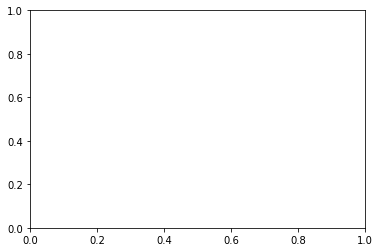

In [16]:
sns.regplot('production_budget','worldwide_gross',data=merge_data)

In [ ]:
merge_data.info()

In [ ]:
merge_dd

In [128]:
original_movieinfo = pd.read_csv("data/rt.movie_info.tsv",sep='\t')
movieinfo_df=original_movieinfo.copy()

In [129]:
movieinfo_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
